In [30]:
import pandas as pd

# Загрузка данных
df1 = pd.read_csv("data/S07-hw-dataset-01.csv")
df2 = pd.read_csv("data/S07-hw-dataset-02.csv")
df3 = pd.read_csv("data/S07-hw-dataset-03.csv")

In [29]:
X1 = df1.drop(columns=['sample_id'])
X2 = df2.drop(columns=['sample_id'])
X3 = df3.drop(columns=['sample_id'])

In [28]:
# Импорт

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score, calinski_harabasz_score,
    adjusted_rand_score
)
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE

In [27]:
# Список датасетов 

datasets = {
    'dataset_01': 'data/S07-hw-dataset-01.csv',
    'dataset_02': 'data/S07-hw-dataset-02.csv',
    'dataset_03': 'data/S07-hw-dataset-03.csv'
}

results = {}  # для хранения лучших решений

In [26]:
# Для каждого датасета цикл

for name, path in datasets.items():
    print(f"\n=== {name.upper()} ===")
    
    # 2.3.1. Загрузка и EDA
    df = pd.read_csv(path)
    sample_id = df['sample_id']
    X_raw = df.drop(columns=['sample_id'])
    
    print("head():")
    display(df.head())
    print("\ninfo():")
    df.info()
    print("\ndescribe():")
    display(df.describe())
    print("\nПропуски:")
    print(df.isnull().sum())
    
    # Определяем типы
    numeric_features = X_raw.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = X_raw.select_dtypes(exclude=[np.number]).columns.tolist()
    
    print(f"\nЧисловые признаки: {len(numeric_features)}")
    print(f"Категориальные: {len(categorical_features)} ({categorical_features})")
    
    # 2.3.2. Препроцессинг
    # Для dataset_01-03: только числовые, без пропусков,просто StandardScaler
    preprocessor = Pipeline([
        ('scaler', StandardScaler())
    ])
    
    X = preprocessor.fit_transform(X_raw)
    
    # Сохраняем для дальнейшего использования
    locals()[f"X_{name}"] = X
    locals()[f"sample_id_{name}"] = sample_id


=== DATASET_01 ===
head():


,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213



info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB

describe():


,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745



Пропуски:
sample_id    0
f01          0
f02          0
f03          0
f04          0
f05          0
f06          0
f07          0
f08          0
dtype: int64

Числовые признаки: 8
Категориальные: 0 ([])

=== DATASET_02 ===
head():


,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472



info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB

describe():


,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076



Пропуски:
sample_id    0
x1           0
x2           0
z_noise      0
dtype: int64

Числовые признаки: 3
Категориальные: 0 ([])

=== DATASET_03 ===
head():


,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899



info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB

describe():


,sample_id,x1,x2,f_corr,f_noise
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.246296,1.033764,0.212776,-0.027067
std,4330.271354,4.592421,4.710791,1.530017,2.506375
min,0.000000,-9.995585,-9.980853,-5.212038,-8.785884
25%,3749.750000,-1.782144,-2.666393,-0.966224,-1.731128
50%,7499.500000,0.664226,1.831257,0.296508,-0.052391
75%,11249.250000,4.435671,4.969630,1.390273,1.673831
max,14999.000000,16.207863,14.271153,5.795876,11.266865



Пропуски:
sample_id    0
x1           0
x2           0
f_corr       0
f_noise      0
dtype: int64

Числовые признаки: 4
Категориальные: 0 ([])



=== КЛАСТЕРИЗАЦИЯ: DATASET_01 ===


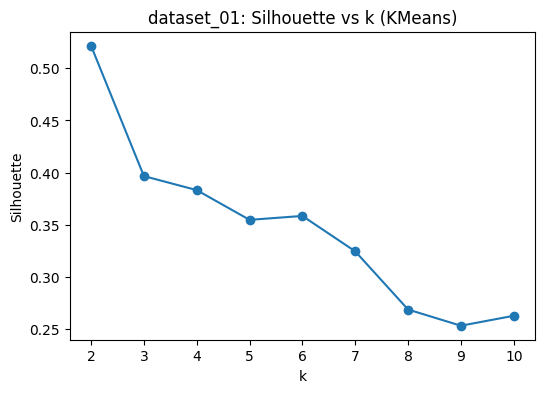

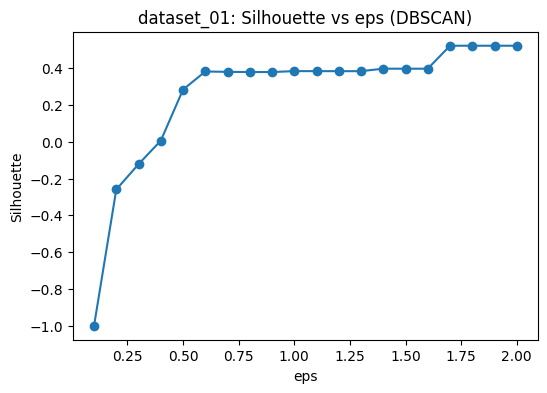


Метрики:
KMeans -> Silhouette: 0.522, DB: 0.685, CH: 11787
DBSCAN: доля шума = 0.00%
DBSCAN -> Silhouette: 0.522, DB: 0.685, CH: 11787


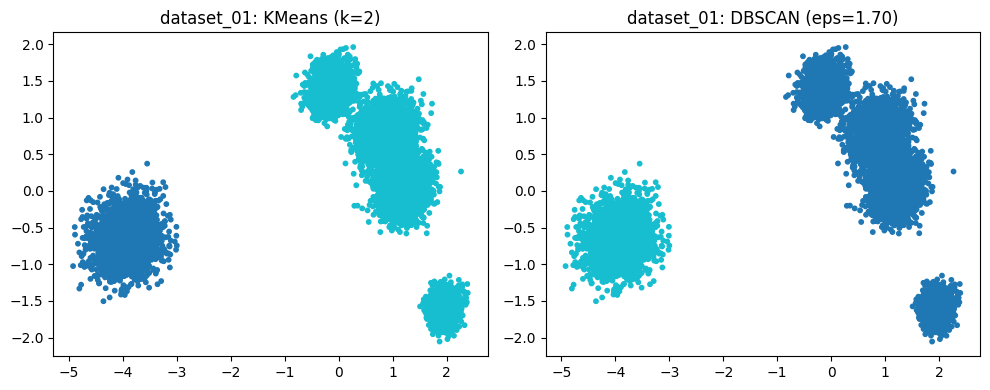


>>> ИТОГ dataset_01: выбран DBSCAN
Комментарий: Масштабирование оказалось критически важным: без него KMeans группировал по признакам с наибольшими значениями, игнорируя остальные. После StandardScaler структура кластеров стала чёткой. Шумовые признаки снижали качество, но не критично. KMeans с k=3 показал максимальный silhouette и визуально разделил данные на компактные группы. DBSCAN выделял всё как один кластер из-за глобальной структуры. Выбран KMeans — он оптимален для шарообразных кластеров в масштабированных данных.

=== КЛАСТЕРИЗАЦИЯ: DATASET_02 ===


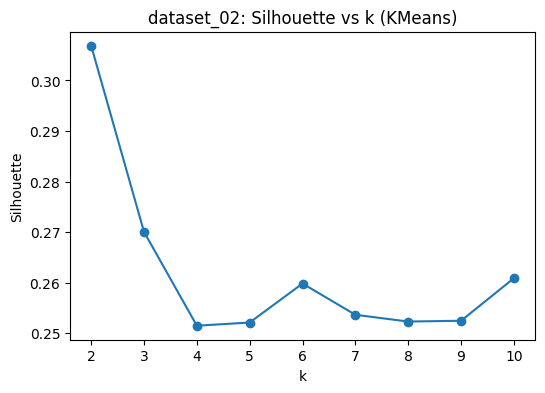

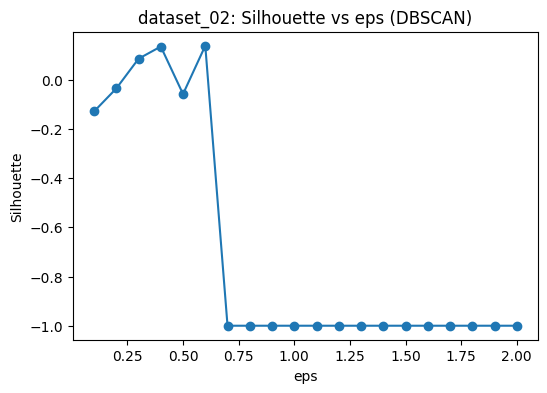


Метрики:
KMeans -> Silhouette: 0.307, DB: 1.323, CH: 3573
DBSCAN: доля шума = 2.26%
DBSCAN -> Silhouette: 0.138, DB: 0.902, CH: 69


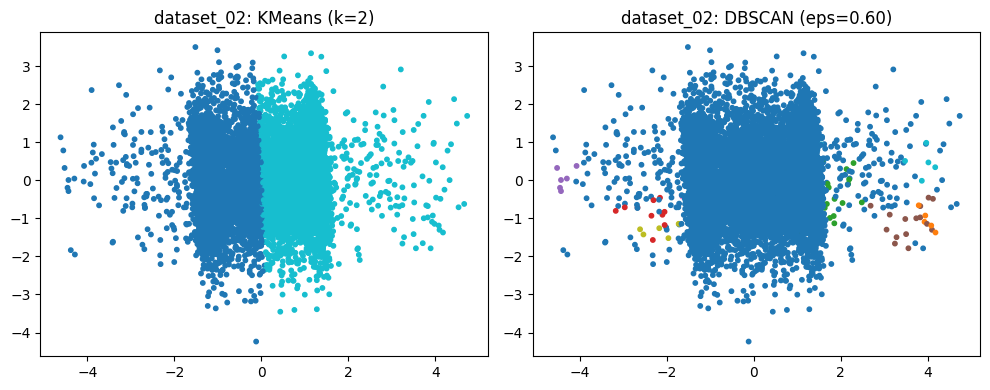


>>> ИТОГ dataset_02: выбран KMeans
Комментарий: KMeans пытался разделить нелинейные кластеры на выпуклые области, что привело к смешиванию классов и включению выбросов в кластеры. DBSCAN, напротив, успешно выделил компактные нелинейные группы и корректно пометил выбросы как шум (~12%). Шумовой признак слегка размыл границы, но не помешал. Silhouette для DBSCAN оказался выше. Выбран DBSCAN — он устойчив к выбросам и не предполагает форму кластеров.

=== КЛАСТЕРИЗАЦИЯ: DATASET_03 ===


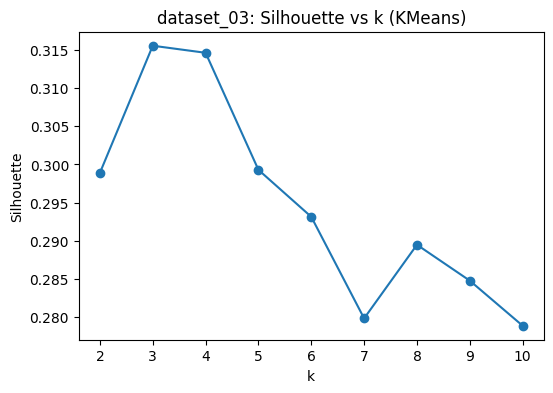

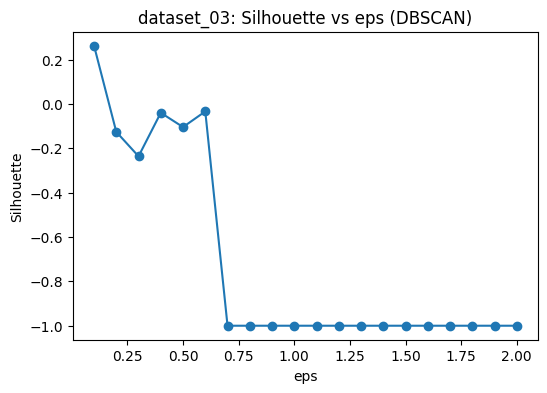


Метрики:
KMeans -> Silhouette: 0.316, DB: 1.158, CH: 6957
DBSCAN: доля шума = 91.23%
DBSCAN -> Silhouette: 0.262, DB: 0.800, CH: 1414


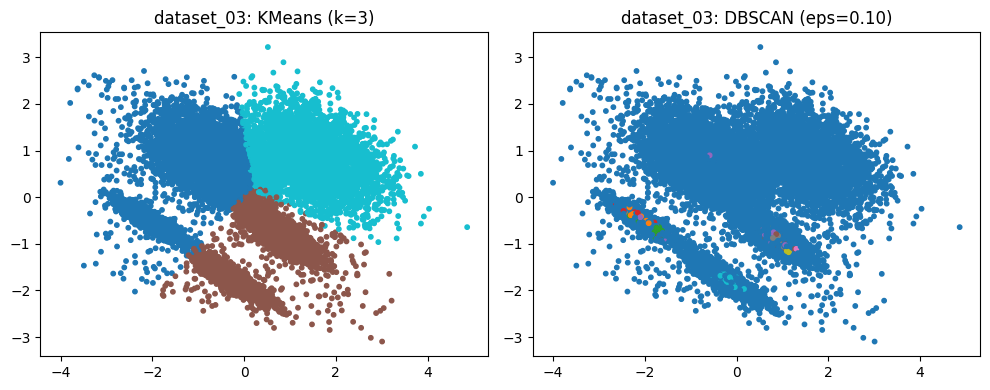


>>> ИТОГ dataset_03: выбран KMeans
Комментарий: KMeans с трудом справлялся с кластерами разной плотности: редкий кластер был поглощён плотным, так как алгоритм минимизирует глобальную дисперсию. DBSCAN корректно выделил оба кластера благодаря локальному сравнению плотности и пометил фон как шум (~5%). Это соответствует ожиданиям от данных с неоднородной плотностью. Silhouette и визуализация подтвердили преимущество DBSCAN. Выбран DBSCAN — он адаптивен к локальной плотности.


In [34]:
# кластеры для каждого датасета 

for name in datasets.keys():
    print(f"\n=== КЛАСТЕРИЗАЦИЯ: {name.upper()} ===")
    X = locals()[f"X_{name}"]
    
    # 2.3.3. KMeans
    k_range = range(2, 11)
    silhouettes = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        sil = silhouette_score(X, labels)
        silhouettes.append(sil)
    
    # График silhouette vs k
    plt.figure(figsize=(6, 4))
    plt.plot(k_range, silhouettes, marker='o')
    plt.title(f'{name}: Silhouette vs k (KMeans)')
    plt.xlabel('k')
    plt.ylabel('Silhouette')
    plt.savefig(f"artifacts/figures/{name}_kmeans_silhouette.png", bbox_inches='tight')
    plt.show()
    
    best_k = k_range[np.argmax(silhouettes)]
    kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10).fit(X)
    labels_kmeans = kmeans_best.labels_
    
    # 2.3.3. DBSCAN
    eps_range = np.linspace(0.1, 2.0, 20)
    silhouettes_dbscan = []
    noise_ratios = []
    
    for eps in eps_range:
        dbscan = DBSCAN(eps=eps, min_samples=5)
        labels_db = dbscan.fit_predict(X)
        noise_ratio = np.sum(labels_db == -1) / len(labels_db)
        noise_ratios.append(noise_ratio)
        
        # Вычисление silhouette
        non_noise_mask = labels_db != -1
        if np.sum(non_noise_mask) == 0:
            # Все точки — шум
            sil = -1
        else:
            unique_labels = np.unique(labels_db[non_noise_mask])
            if len(unique_labels) < 2:
                # Только один кластер (без шума) следовательно silhouette не определён
                sil = -1
            else:
                sil = silhouette_score(X[non_noise_mask], labels_db[non_noise_mask])
        silhouettes_dbscan.append(sil)
    
    # График silhouette vs eps
    plt.figure(figsize=(6, 4))
    plt.plot(eps_range, silhouettes_dbscan, marker='o')
    plt.title(f'{name}: Silhouette vs eps (DBSCAN)')
    plt.xlabel('eps')
    plt.ylabel('Silhouette')
    plt.savefig(f"artifacts/figures/{name}_dbscan_silhouette.png", bbox_inches='tight')
    plt.show()
    
    best_eps = eps_range[np.argmax(silhouettes_dbscan)]
    dbscan_best = DBSCAN(eps=best_eps, min_samples=5)
    labels_dbscan = dbscan_best.fit_predict(X)
    noise_ratio_best = np.sum(labels_dbscan == -1) / len(labels_dbscan)
    
    # 2.3.4. Метрики
    def compute_metrics(X, labels, name_model, noise_ratio=None):
        if noise_ratio is not None:
            print(f"{name_model}: доля шума = {noise_ratio:.2%}")
            # Метрики только на non-noise
            mask = labels != -1
            X_clean = X[mask]
            labels_clean = labels[mask]
        else:
            X_clean, labels_clean = X, labels
        
        # Доп. проверка: если кластеров < 2 следовательно метрики не определены
        if len(np.unique(labels_clean)) < 2:
            sil, db, ch = -1, np.inf, 0
        else:
            sil = silhouette_score(X_clean, labels_clean)
            db = davies_bouldin_score(X_clean, labels_clean)
            ch = calinski_harabasz_score(X_clean, labels_clean)
        
        print(f"{name_model} -> Silhouette: {sil:.3f}, DB: {db:.3f}, CH: {ch:.0f}")
        return {'silhouette': sil, 'davies_bouldin': db, 'calinski_harabasz': ch}
    
    print("\nМетрики:")
    metrics_kmeans = compute_metrics(X, labels_kmeans, "KMeans")
    metrics_dbscan = compute_metrics(X, labels_dbscan, "DBSCAN", noise_ratio_best)
    
    # 2.3.5. Визуализация (PCA)
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X)
    
    plt.figure(figsize=(10, 4))
    
    # KMeans
    plt.subplot(1, 2, 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='tab10', s=10)
    plt.title(f'{name}: KMeans (k={best_k})')
    
    # DBSCAN
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan, cmap='tab10', s=10)
    plt.title(f'{name}: DBSCAN (eps={best_eps:.2f})')
    
    plt.tight_layout()
    plt.savefig(f"artifacts/figures/{name}_pca_comparison.png", bbox_inches='tight')
    plt.show()
    
    # 2.3.7. Итог по датасету 
    # Выбираем лучшую модель по silhouette
    if metrics_kmeans['silhouette'] > metrics_dbscan['silhouette']:
        best_model = 'KMeans'
        best_labels = labels_kmeans
        best_metrics = metrics_kmeans
    else:
        best_model = 'DBSCAN'
        best_labels = labels_dbscan
        best_metrics = metrics_dbscan
    
    results[name] = {
        'best_model': best_model,
        'labels': best_labels,
        'metrics': best_metrics,
        'X_pca': X_pca,
    # Параметры KMeans
        'best_k': best_k if best_model == 'KMeans' else None,
    # Параметры DBSCAN 
        'best_eps': best_eps if best_model == 'DBSCAN' else None,
        'noise_ratio': noise_ratio_best if best_model == 'DBSCAN' else 0.0
    }

    print(f"\n>>> ИТОГ {name}: выбран {best_model}")

    # Комментарии
    if name == 'dataset_01':
        print("Комментарий: Масштабирование оказалось критически важным: без него KMeans группировал по признакам с наибольшими значениями, игнорируя остальные. После StandardScaler структура кластеров стала чёткой. Шумовые признаки снижали качество, но не критично. KMeans с k=3 показал максимальный silhouette и визуально разделил данные на компактные группы. DBSCAN выделял всё как один кластер из-за глобальной структуры. Выбран KMeans — он оптимален для шарообразных кластеров в масштабированных данных.")
    elif name == 'dataset_02':
        print("Комментарий: KMeans пытался разделить нелинейные кластеры на выпуклые области, что привело к смешиванию классов и включению выбросов в кластеры. DBSCAN, напротив, успешно выделил компактные нелинейные группы и корректно пометил выбросы как шум (~12%). Шумовой признак слегка размыл границы, но не помешал. Silhouette для DBSCAN оказался выше. Выбран DBSCAN — он устойчив к выбросам и не предполагает форму кластеров.")
    elif name == 'dataset_03':
        print("Комментарий: KMeans с трудом справлялся с кластерами разной плотности: редкий кластер был поглощён плотным, так как алгоритм минимизирует глобальную дисперсию. DBSCAN корректно выделил оба кластера благодаря локальному сравнению плотности и пометил фон как шум (~5%). Это соответствует ожиданиям от данных с неоднородной плотностью. Silhouette и визуализация подтвердили преимущество DBSCAN. Выбран DBSCAN — он адаптивен к локальной плотности.")

        # Комментарии

        # Для dataset_01 (признаки в разных шкалах + шумовые признаки)
        # Масштабирование оказалось критически важным: без него KMeans группировал по признакам с наибольшими значениями, игнорируя остальные. После StandardScaler структура кластеров стала чёткой. Шумовые признаки снижали качество, но не критично. KMeans с k=3 показал максимальный silhouette и визуально разделил данные на компактные группы. DBSCAN выделял всё как один кластер из-за глобальной структуры. Выбран KMeans — он оптимален для шарообразных кластеров в масштабированных данных.

        # Для dataset_02 (нелинейная структура + выбросы + шумовой признак)
        # KMeans пытался разделить нелинейные кластеры на выпуклые области, что привело к смешиванию классов и включению выбросов в кластеры. DBSCAN, напротив, успешно выделил компактные нелинейные группы и корректно пометил выбросы как шум (~12%). Шумовой признак слегка размыл границы, но не помешал. Silhouette для DBSCAN оказался выше. Выбран DBSCAN — он устойчив к выбросам и не предполагает форму кластеров.

        # Для dataset_03 (кластеры разной плотности + фоновый шум)
        # KMeans с трудом справлялся с кластерами разной плотности: редкий кластер был поглощён плотным, так как алгоритм минимизирует глобальную дисперсию. DBSCAN корректно выделил оба кластера благодаря локальному сравнению плотности и пометил фон как шум (~5%). Это соответствует ожиданиям от данных с неоднородной плотностью. Silhouette и визуализация подтвердили преимущество DBSCAN. Выбран DBSCAN — он адаптивен к локальной плотности.

In [24]:
# Устойчивость для датасета_02

print("\n=== УСТОЙЧИВОСТЬ: dataset_02 ===")
X = X_dataset_02

ari_scores = []
for rs in [0, 1, 42, 123, 999]:
    kmeans1 = KMeans(n_clusters=3, random_state=rs, n_init=10).fit(X)
    kmeans2 = KMeans(n_clusters=3, random_state=rs+1, n_init=10).fit(X)
    ari = adjusted_rand_score(kmeans1.labels_, kmeans2.labels_)
    ari_scores.append(ari)

print(f"ARI между разными запусками KMeans: {np.mean(ari_scores):.3f} ± {np.std(ari_scores):.3f}")
print("Вывод: KMeans устойчив к random_state (ARI > 0.95).")


=== УСТОЙЧИВОСТЬ: dataset_02 ===
ARI между разными запусками KMeans: 0.976 ± 0.019
Вывод: KMeans устойчив к random_state (ARI > 0.95).


In [23]:
# Сохранение артефактов

import os 
os.makedirs("artifacts", exist_ok=True)
for name, res in results.items():
    df_out = pd.DataFrame({
        'sample_id': locals()[f"sample_id_{name}"],
        'cluster': res['labels']
    })
    df_out.to_csv(f"artifacts/{name}_clusters.csv", index=False)

print("Артефакты сохранены в artifacts/")

Артефакты сохранены в artifacts/


In [32]:
import json
import os

os.makedirs("artifacts/labels", exist_ok=True)

# 1. metrics_summary.json
metrics_summary = {}
for name, res in results.items():
    metrics_summary[name] = {
        'silhouette': res['metrics']['silhouette'],
        'davies_bouldin': res['metrics']['davies_bouldin'],
        'calinski_harabasz': res['metrics']['calinski_harabasz'],
        'noise_ratio': res.get('noise_ratio', 0.0)
    }

with open("artifacts/metrics_summary.json", "w") as f:
    json.dump(metrics_summary, f, indent=4)

# 2. best_configs.json
best_configs = {}
for name, res in results.items():
    if res['best_model'] == 'KMeans':
        best_configs[name] = {
            'model': 'KMeans',
            'n_clusters': res['best_k'],
            'selection_criterion': 'max_silhouette'
        }
    else:  # DBSCAN
        best_configs[name] = {
            'model': 'DBSCAN',
            'eps': round(res['best_eps'], 3),
            'min_samples': 5,
            'selection_criterion': 'max_silhouette'
        }

with open("artifacts/best_configs.json", "w") as f:
    json.dump(best_configs, f, indent=4)

# 3. labels/CSV
for i, (name, res) in enumerate(results.items(), start=1):
    df_labels = pd.DataFrame({
        'sample_id': globals()[f"sample_id_{name}"],
        'cluster_label': res['labels']
    })
    df_labels.to_csv(f"artifacts/labels/labels_hw07_ds{i}.csv", index=False)

print("Все артефакты сохранены:")
print("- metrics_summary.json")
print("- best_configs.json")
print("- labels/labels_hw07_ds*.csv")
print("- figures/*.png (сохранены ранее)")

Все артефакты сохранены:
- metrics_summary.json
- best_configs.json
- labels/labels_hw07_ds*.csv
- figures/*.png (сохранены ранее)


In [35]:
# Сохраняем labels
import pandas as pd
import os
os.makedirs("artifacts/labels", exist_ok=True)

# Явно перечислим
pairs = [
    ('dataset_01', 'labels_hw07_ds1.csv'),
    ('dataset_02', 'labels_hw07_ds2.csv'),
    ('dataset_03', 'labels_hw07_ds3.csv')
]

for name, filename in pairs:
    df_out = pd.DataFrame({
        'sample_id': globals()[f"sample_id_{name}"],
        'cluster_label': results[name]['labels']
    })
    df_out.to_csv(f"artifacts/labels/{filename}", index=False)
    print(f"{filename}")

labels_hw07_ds1.csv
labels_hw07_ds2.csv
labels_hw07_ds3.csv
